# Propagating Monte Carlo Error: Python3
By: Nicholas Chieppa & Ben Donahue

# Generate Random Data

In [254]:
import numpy as np
import scipy.stats as spy
import scipy.integrate as inter
import inspect
from matplotlib import pyplot as plt
from matplotlib import patches as pltPatch

The fucntions below allow us to generate and create plots for our data sets

In [255]:
xvals = np.linspace(-1, 1, 11) # Project Requirements specify 11 points on -1, 1
def makeFakeData(fn):
    return fn(xvals)+np.random.normal(size=len(xvals))

figure = 0
def plotID(): # plot incrementation
    global figure
    figure = figure + 1
    return figure

def scatter(data, title): # create scatter plot
    plt.figure(plotID())
    plt.title(title)
    plt.scatter(xvals, data)

Below is the funcitons that are used to create fake data. Using Known functions we are able to test the results of the functions we write. 

In [256]:
fn1 = lambda x: -2+3.*x 
fn2 = lambda x: 3.

In [257]:
samples = 1000
def createDataSet(fn):
    data = []
    for index in np.arange(samples): # at least 1000 data sets
        x = makeFakeData(fn)
        data.append(np.polyfit(xvals, x, 1))
    return np.array(data), x

fn1Data = createDataSet(fn1)
fn2Data = createDataSet(fn2)

Below are graphs of the data sets created for our fake data. Note that even though the individual points have some randomness they visually appear to follow the trend suppiled by the original known functions.

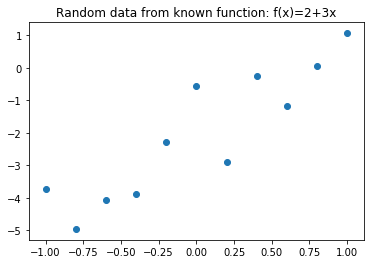

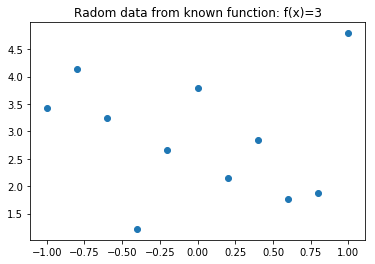

In [258]:
scatter(fn1Data[1], "Random data from known function: f(x)=2+3x")
scatter(fn2Data[1], "Radom data from known function: f(x)=3")

# Distibution of Linear Fit Coefficients
A linear equation has the general formula f(x)= mx + b.

The first coefficient that the polyfit function generates is the estimate for b and the second coefficient is the estimate for the slope of the function m. 

This equates to C0 = b and C1 = m.

The correlation coefficient generated for the data sets show that the the values of the Ck's is very strong. This means that the covarience between the variable will have a high relation. Additionally, a high correlation coefficient suggests that the variables are not independent of each other and instead jointly distriubited. 

Properties of generated test data with known function: fn = -2 + 3x
Estimated function
f: -1.99 + 3.0 x
C0 = -1.99 ; C1 = 3.0
Correlation coeff: [[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]
Variance of Ck: C0 = 0.09 ; C1 = 0.24
Covariance of C0, C1 5.08956098557416e-05

Properties of generated test data with known function: fn = 3
Estimated function
f: 2.99 + 0.02 x
C0 = 2.99 ; C1 = 0.02
Correlation coeff: [[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]
Variance of Ck: C0 = 0.09 ; C1 = 0.23
Covariance of C0, C1 0.0003529436689962271


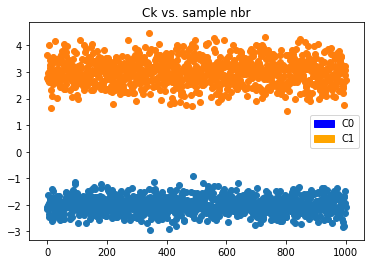

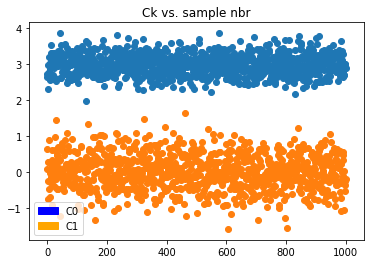

In [259]:
def printProp(data):
    print("Estimated function")
    ck0 = np.round(np.mean(data[0][:,1]), 2)
    ck1 = np.round(np.mean(data[0][:,0]), 2)
    print("f:", ck0, "+", ck1, "x")
    print("C0 =", ck0, "; C1 =", ck1)
    
    ck0var = np.round(np.var(data[0][:,1]), 2)
    ck1var = np.round(np.var(data[0][:,0]), 2)
    
    r = np.corrcoef(data[0])
    print("Correlation coeff:", r)
    
    covar = np.round(np.cov(data[0]), 3)
    covar = np.mean((data[0][:,1] - ck0)*(data[0][:,0] - ck1))
    print("Variance of Ck: C0 =", ck0var, "; C1 =", ck1var)
    print("Covariance of C0, C1", covar)
    
    return (ck0, ck0var), (ck1, ck1var), covar, lambda x: ck0 + ck1 * x 

def fakeScatter(data):
    plt.figure(plotID())
    plt.title("Ck vs. sample nbr")
    ck0_leg = pltPatch.Patch(color = 'blue', label='C0')
    ck1_leg = pltPatch.Patch(color = 'orange', label='C1')
    plt.legend(handles=[ck0_leg, ck1_leg])
    plt.scatter(list(range(samples)), data[0][:,1])
    plt.scatter(list(range(samples)), data[0][:,0])

    
print("Properties of generated test data with known function: fn = -2 + 3x")
fn1prop = printProp(fn1Data)
fakeScatter(fn1Data)

print()
print("Properties of generated test data with known function: fn = 3")
fn2prop = printProp(fn2Data)

fakeScatter(fn2Data)

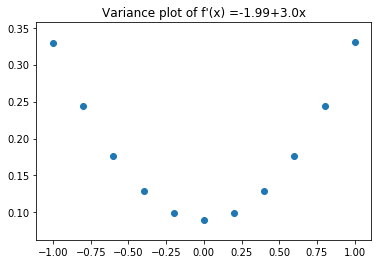

In [260]:
def propstring(fun): # create string from the function properties
    return "f'(x) =" + str(fun[0][0]) + "+" + str(fun[1][0]) + "x"

def varfprime(fun, x):
    return x ** 2 * fun[1][1] + fun[0][1] + 2 * (x) * fun[2]

scatter(varfprime(fn1prop, xvals), "Variance plot of " + propstring(fn1prop))

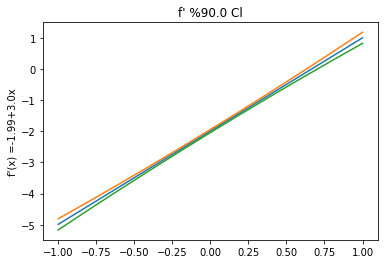

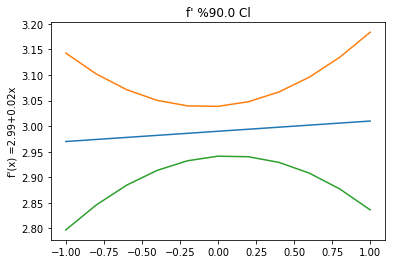

In [261]:
def confidence(conf, trials):
    return -spy.t.ppf((1.-conf)/2., trials)

def plotfprime(fun, x, conf):
    plt.figure(plotID())
    title = "f' %" + str(conf*100) + " Cl" 
    plt.title(title)
    plt.ylabel(propstring(fun))
    plt.plot(x, fun[3](x))
    z = confidence(conf, len(x))
    plt.plot(x, fun[3](x) + z * varfprime(fun, x) * len(x) ** -.5)
    plt.plot(x, fun[3](x) + - z * varfprime(fun, x) * len(x) ** -.5)
    
plotfprime(fn1prop, xvals, .90)
plotfprime(fn2prop, xvals, .90)

In [262]:
def confIprime(fun, x, conf):
    z = confidence(conf, len(x))
    I = np.round(inter.quad(fun[3], x[0], x[-1])[0], 3)
    print("I' = ", I)
    
confIprime(fn1prop, xvals, .9)

I' =  -3.98


# Anaysis on Real data
Now that the functions above have been tested on the fake data, they can be used on the real data. (classA6.dat)

Using these functions I approximated f'(x) = 1.55 + 8.1x. And I' = 3.1 for x-values -1 to 1

Estimated function
f: 1.55 + 8.1 x
C0 = 1.55 ; C1 = 8.1
Correlation coeff: 1.0
Variance of Ck: C0 = 0.0 ; C1 = 0.0
Covariance of C0, C1 -7.515060275085242e-07


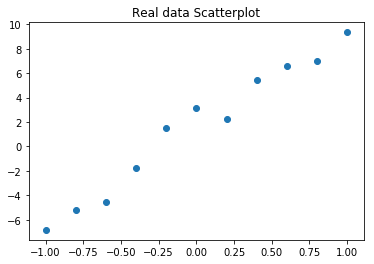

In [263]:
filepath = "classA6.dat"
#xvals
data = []

def readData(file):
    result = []
    line = f.readline().strip().split("\t")
    for val in line:
        result.append(float(eval(val)))
    return result

with open(filepath) as f:
    #xvals = readData(f)
    readData(f)
    data = readData(f)

def polyfitreal(xvals, data):
    result = []
    result.append(np.polyfit(xvals, data, 1))
    return np.array(result), data
    
fnreal = polyfitreal(xvals, data)
scatter(fnreal[1], "Real data Scatterplot")

fnRprop = printProp(fnreal)

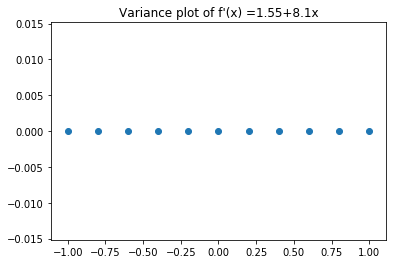

In [267]:
scatter(varfprime(fnRprop, xvals), "Variance plot of " + propstring(fnRprop))

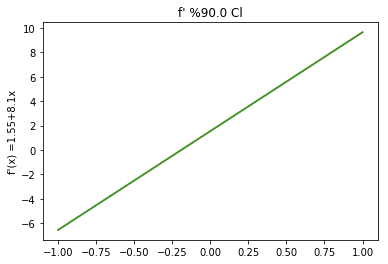

In [270]:
plotfprime(fnRprop, xvals, .90)

In [271]:
confIprime(fnRprop, xvals, .9)

I' =  3.1
